# CLIENTS SEGMENTATION

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from scipy.stats import skew,skewtest

RANDOM_SEED=0

In [3]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"

In [69]:
'''
Uploading the DataFrame 
'''
df= pd.read_csv(DATASET_URL)
df.shape

(8950, 18)

## Exploration of the dataframe

In [4]:
'''
Explorative analysis of the dataframe
'''
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Già da una prima analisi delle statistiche del dataframe emerge come sia necessario riscalare le variabili affinchè esse possano essere comparate. Infatti i valori di medie e deviazione std delle differenti variabili sono molto disomogenei.

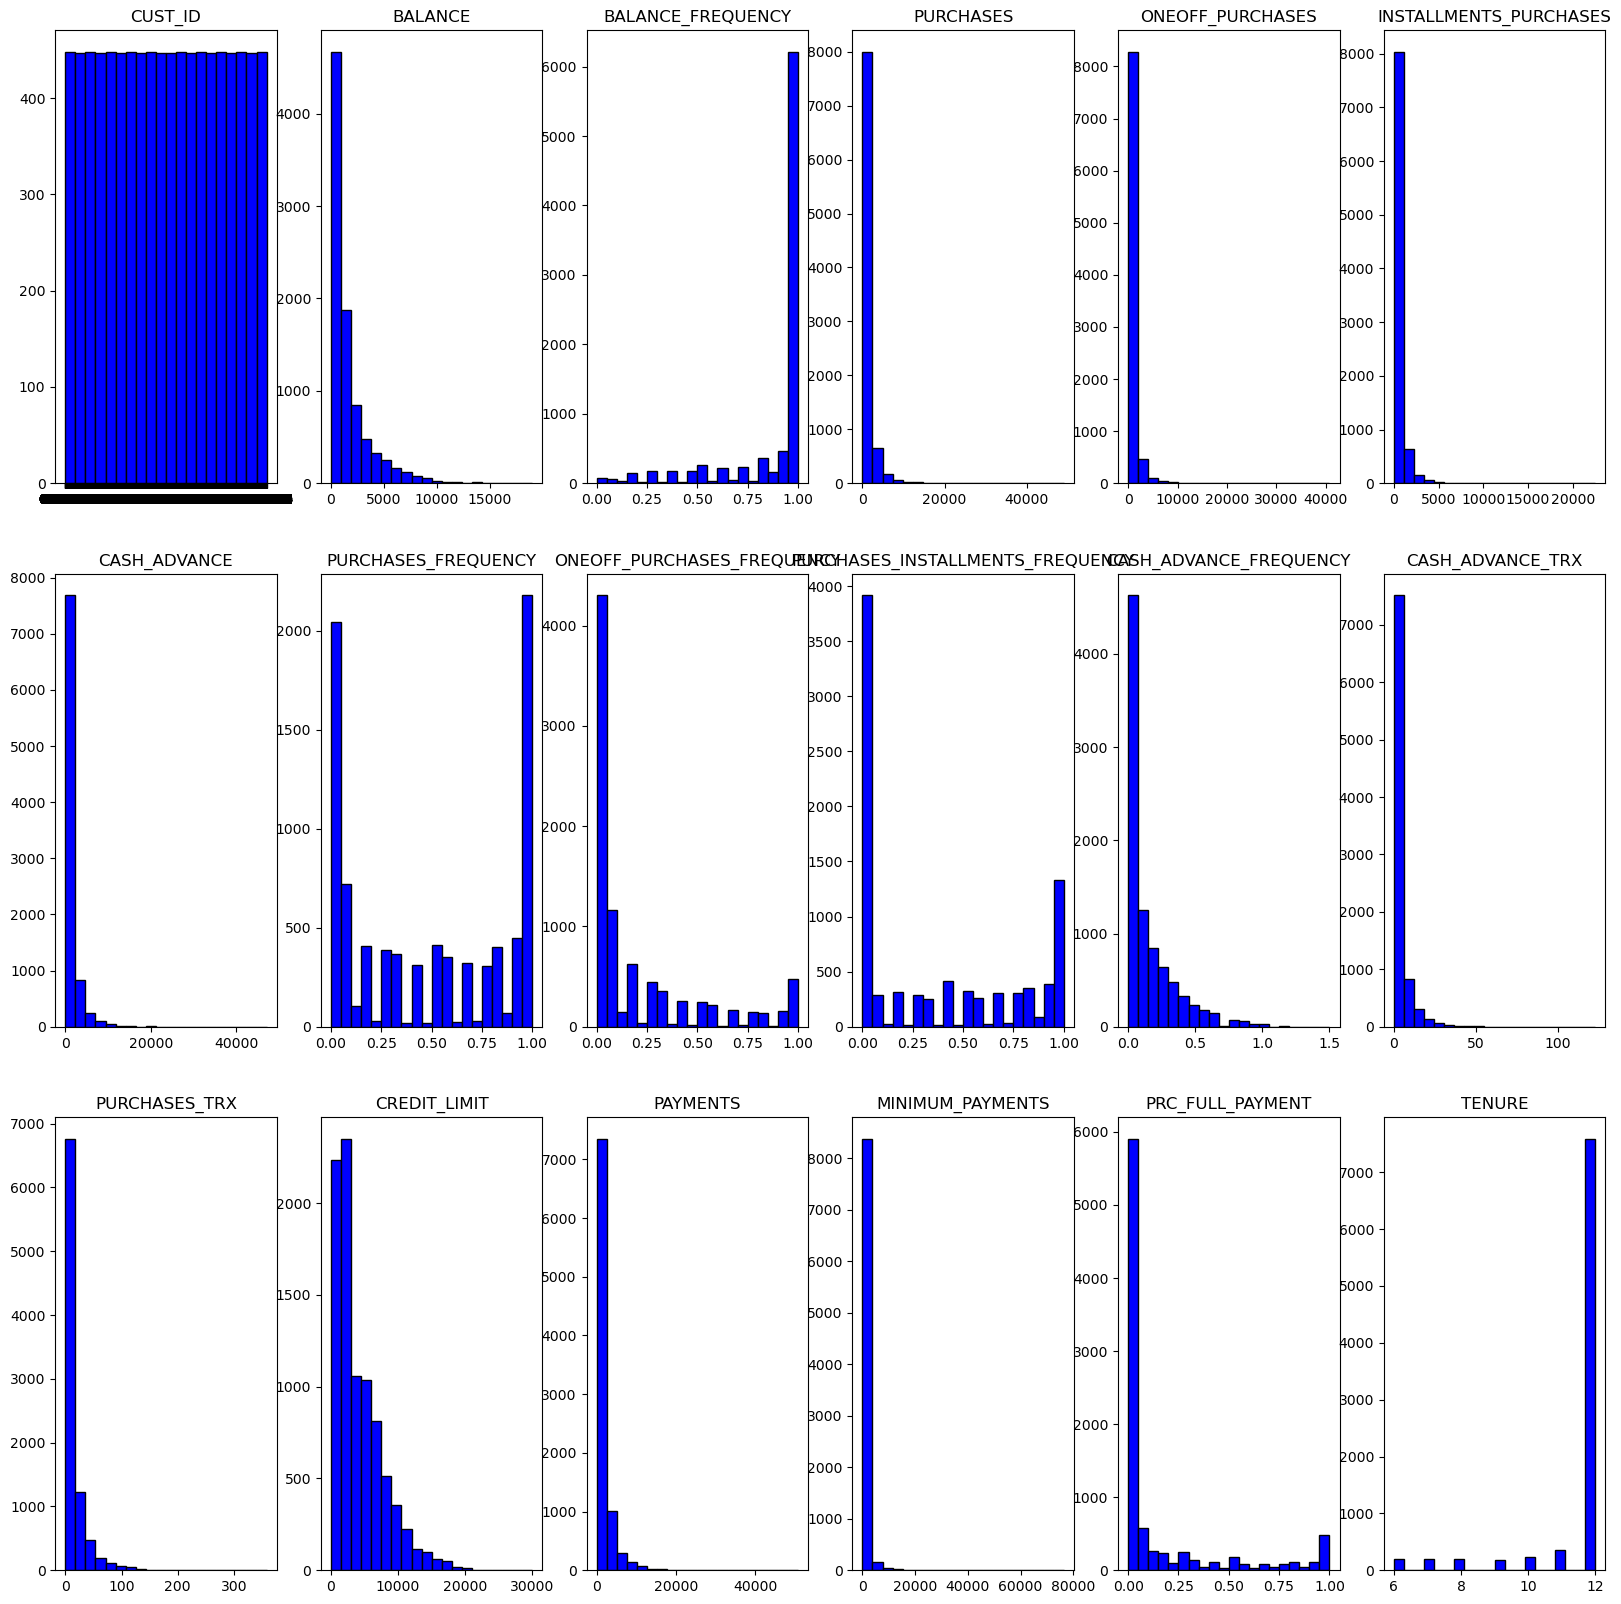

In [5]:
'''
Searching level of SEPARABILITY and DENSITY of the data for each variable.
Plotting histograms for each variable.
'''

#subplot form
fig, axes = plt.subplots(3, 6, figsize=(20, 20))
axes = axes.flatten()

#Histograms
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=20, color='blue', edgecolor='black')
    axes[i].set_title(col)

Si elimina subito la variabile CUST_ID in quanto priva di valore informativo

In [70]:
df= df.drop('CUST_ID',axis=1)
df.shape

(8950, 17)

Si cerca inoltre di definire il livello di correlazione tra variabili.

<Axes: >

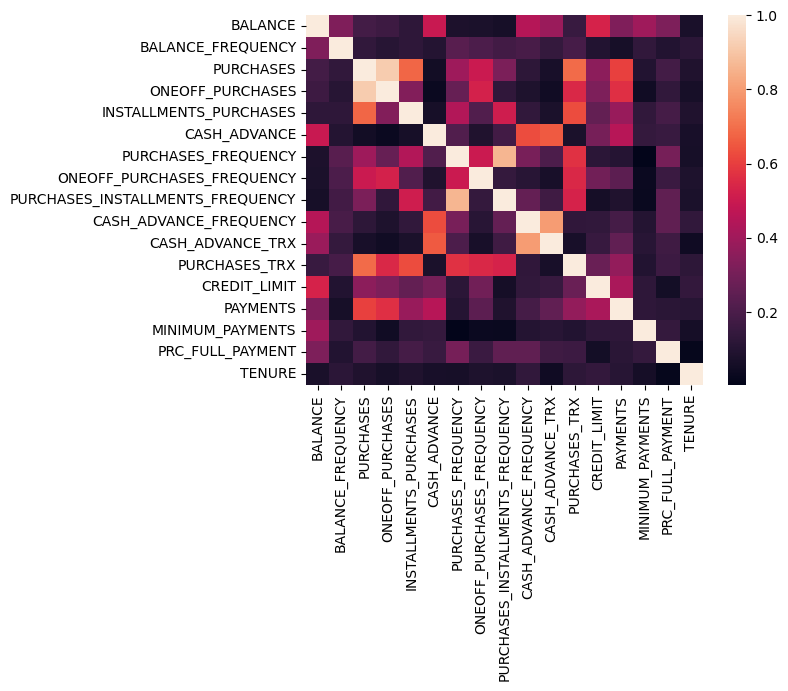

In [71]:
'''
Heatmap for highlighting correlations between variables
'''
sns.heatmap(df.corr().abs())

Le variabili sono tutte abbastanza scorrelate ad eccezione di alcune (3) coppie di variabili.
- PURCHASES e ONEOFF_PURCHASES
- PURCHASES_INSTALLMENTS_FREQUENCY e PURCHASES_FREQUENCY
- CASH_ADVANCE_FREQUENCY e CASH_ADVANCE_TRX

Siamo in un caso di multicolinearità.

## Pre-processing

In [72]:
'''
Checking for Nan values
'''
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [73]:
'''
Substituting the 313 Nan values with 0 for the variable MINIMUM_PAYMENTS
and the 1 Nan value with the mean value of the variable CREDIT_LIMIT.
'''

df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

#check
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
'''
Visualizing the skewness of the variables
'''
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [74]:
'''
initialising Standard Scaler
'''
ss= StandardScaler()

In [75]:
#primo esempio: ['CREDIT_LIMIT','BALANCE']

X= df[['CREDIT_LIMIT','BALANCE']].values
X_scaled=ss.fit_transform(X)

Questa coppia aiuta a capire la gestione del credito da parte degli utenti, ossia quanto utilizzano del loro limite di credito.

In [39]:
''''
defining function for plotting ssd curve
'''

def plot_ssd_curve(data):
    ssd={}
    for k in range(2,10):
        kmeans= KMeans(n_clusters=k, init='k-means++',random_state=RANDOM_SEED).fit(data)
        ssd[k]=kmeans.inertia_

    plt.plot(list(ssd.keys()),list(ssd.values()),marker='o')
    plt.xlabel('Numero di cluster', fontsize= 20)
    plt.ylabel('ssd value', fontsize=20)
    plt.show()
   

'''
defining function for plotting the cluters and their centroids.
arguments:
    model= trained k-means model
    data= array of data to plot
    axlabels= labels of the axis
    print_ssd= False -> if the ssd curve has been plotted it returns the SSD value
'''

def plot_clusters(model, data, axlabels=None, print_ssd=False):
    y_pred = model.predict(data)
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
    if axlabels:
        plt.xlabel(axlabels[0], fontsize=16)
        plt.ylabel(axlabels[1], fontsize=16)
    if print_ssd:
        plt.text(data[:,0].max()-1, -1, f"SSD={model.inertia_:.2f}")
    plt.show()

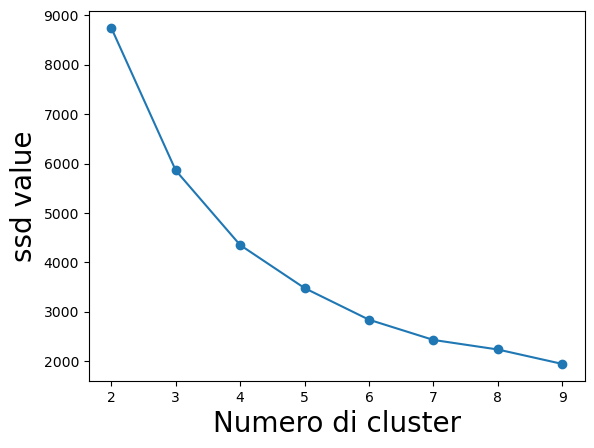

In [64]:
plot_ssd_curve(X_scaled)

In [65]:
'''
training the kmeans model for 5 cluters
'''
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=RANDOM_SEED)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=0)

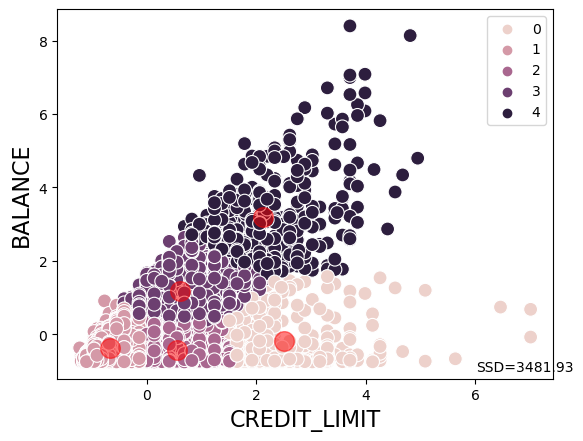

In [66]:
plot_clusters (kmeans, X_scaled, axlabels= ["CREDIT_LIMIT","BALANCE"],print_ssd=True)

Si possono distingure 5 gruppi di clienti:
- 0 = il saldo è basso rispetto al limite di credito che è abbastanza elevato. Questi clienti sono MOLTO PRUDENTI nella gestione del credito; (utenti molto prudenti)
- 1 = sia il saldo che il limite di credito sono molto bassi. Questi clienti utilizzano la maggior parte del credito disponibile; (utenti che esauriscono credito - molto basso)
- 2 = il saldo è basso rispetto al limite di credito (comunque basso ma superiore a quello del gruppo 1). Questi clienti sono ABBASTANZA PRUDENTI nella gestione del loro credito. (utenti abbastanza prudenti)
- 3 = a parità di limite di credito con gruppo 2, questo gruppo di utenti ha un saldo più elevato. Questi clienti dunque utilizzano la maggior parte del loro credito disponibile avendo limiti di credito superiori. (utenti che esauriscono credito - basso)
- 4 = utenti con un saldo elevato e un limite di credito alto potrebbero essere a rischio di insolvenza se non riescono a ripagare il loro debito. (utenti rischio insolvenza)

In [46]:
#secondo esempio: ['CREDIT_LIMIT','PAYMENTS']

X2= df[['CREDIT_LIMIT','PAYMENTS']].values
X2_scaled= ss.fit_transform(X2)

Questa coppia può indicare la capacità dell'utente di ripagare il proprio debito.

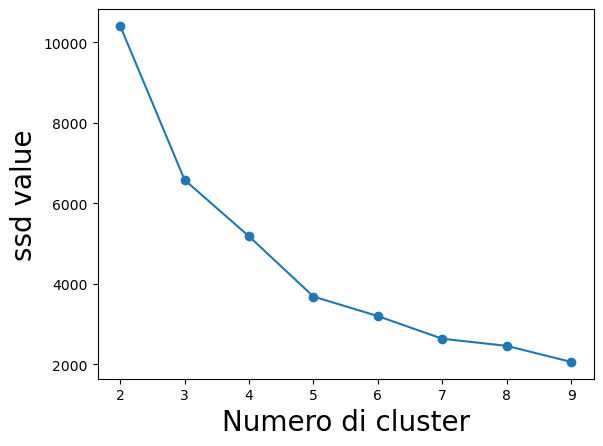

In [47]:
plot_ssd_curve(X2_scaled)

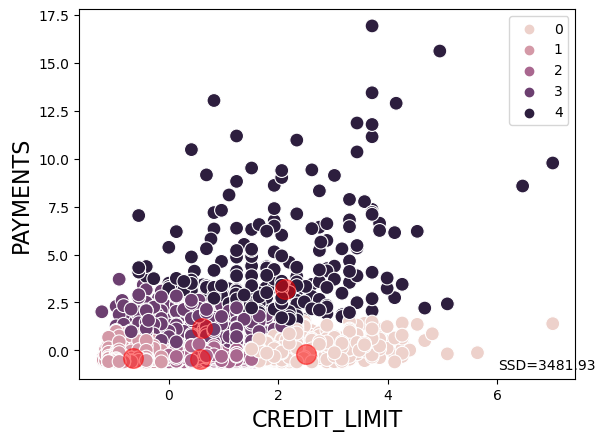

In [48]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=RANDOM_SEED)
kmeans.fit(X_scaled)
plot_clusters (kmeans, X2_scaled, axlabels= ['CREDIT_LIMIT','PAYMENTS'],print_ssd=True)

- utenti molto prudenti: questi utenti prudenti nell'utilizzo del proprio credito effettuano pagamenti di bassi importi; non si esclude una difficoltà nella gestione del proprio debito.
- utenti che esauriscono credito - molto basso: questi utenti effettuano dei pagamenti bassi e in rapporto con il loro limite di credito potrebbero gestire abbastanza bene il loro debito.
- utenti abbastanza prudenti: questi utenti effettuano dei pagamenti bassi e in rapporto con il loro limite di credito potrebbero presentare con basse probabilità difficoltà nella gestione del proprio debito.
- utenti che esauriscono credito - basso: questi utenti effettuano pagamenti più alti rispetto ai gruppi precedenti e, in rapporto al loro limite di credito, potrebbero essere in grado di gestire bene il proprio debito.
- utenti rischio insolvenza: questi utenti a rischio insolvenza non effettuano mediamente dei pagamenti molto elevati quindi ci si aspetta qualche difficoltà enlla gestione del debito.

### conclusioni:

gruppo "utenti molto prudenti": 
- Saldo basso rispetto al limite di credito alto.
- Molto prudenti nella gestione del credito.
- Effettuano pagamenti di bassi importi.
- Possibile difficoltà nella gestione del debito.

**si potrebbero offrire carte con bassi tassi di interesse e programmi di ricompense per piccoli acquisti. Includere opzioni di monitoraggio del credito e consulenza finanziaria gratuita. forse è necessario sottolineare i benefici della sicurezza finanziaria e l'assenza di rischi di interessi elevati. Promuovere strumenti di gestione del bilancio integrati nella carta.**


gruppo "utenti che esauriscono credito - molto basso":
- Sia il saldo che il limite di credito sono molto bassi.
- Utilizzano la maggior parte del credito disponibile.
- Effettuano pagamenti bassi e gestiscono abbastanza bene il debito.

**si potrebbero offrire carte con bassi limiti di credito iniziali ma con possibilità di aumentare il limite con l'uso responsabile. forse è necessario mettere in evidenza la flessibilità della carta e i vantaggi di premi per piccoli acquisti. Incentivare l'uso responsabile per aumentare il limite di credito.**


gruppo "utenti abbastanza prudenti":
- Saldo basso rispetto al limite di credito basso (ma superiore al gruppo 1).
- Abbastanza prudenti nella gestione del credito.
- Effettuano pagamenti bassi con basse probabilità di difficoltà nella gestione del debito.

**si potrebbero offrire carte con programmi di ricompense moderati, tassi di interesse competitivi e strumenti di gestione del credito. Includere promozioni su spese quotidiane. forse è necessario evidenziare la sicurezza finanziaria e i vantaggi dei premi per gli acquisti di tutti i giorni. Promuovere strumenti educativi per migliorare ulteriormente la gestione del credito.**


gruppo "utenti che esauriscono credito - basso":
- Limite di credito e saldo più elevati rispetto al gruppo di utenti abbastanza prudenti.
- Utilizzano la maggior parte del loro credito disponibile.
- Effettuano pagamenti più alti rispetto ai gruppi precedenti.

**si potrebbero offrire carte con alti limiti di credito e premi significativi per acquisti frequenti e grandi spese. forse è necessario mettere in risalto i vantaggi esclusivi e i premi di alto valore. Promuovere la carta come un simbolo di status e flessibilità finanziaria.**


gruppo "utenti rischio insolvenza":
- Saldo elevato e limite di credito alto.
- Potenziale rischio di insolvenza.
- Effettuano pagamenti mediamente non molto elevati.

**si potrebbero offrire carte con strumenti di gestione del debito e piani di pagamento flessibili. Includere accesso a consulenti finanziari e programmi di consolidamento del debito. forse è necessario sottolineare i vantaggi della gestione del debito e della consulenza finanziaria. Promuovere soluzioni di pagamento flessibili e tassi di interesse ridotti per ridurre il rischio di insolvenza.**

In [8]:
'''
first scaling of data
'''
ss= StandardScaler()
df2= ss.fit_transform(df)

Applico PCA

In [9]:
pca= PCA()
pca.fit(df2)

PCA()

<BarContainer object of 17 artists>

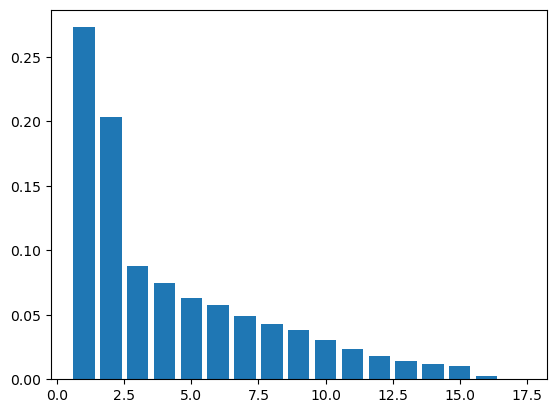

In [10]:
x = range(1,df2.shape[1]+1)
y = pca.explained_variance_ratio_
plt.bar(x,y)

In [11]:
'''
new pca with 2 variables
'''
pca= PCA(2)
pca.fit(df2)

PCA(n_components=2)

In [12]:
'''
making a pipeline fro generating the cleaned dataset
'''
pipe= make_pipeline(ss,pca)
df3= pipe.fit_transform(df)

Calcoliamo la skewness nelle due variabili considerate dopo lo Standard Scaler per capire quanta asimmetria c'è ancora.

In [13]:
'''
calculating skewness as absolute value
'''
np.abs(skew(df3))

array([3.22727452, 2.06733304])

L'asimmetria è ancora alta quindi la si prova a ridurre tramite la Power Trnasformation

In [14]:
'''
applying Power Transformation
'''
pipe= make_pipeline(ss,pca,PowerTransformer())
df4= pipe.fit_transform(df)

In [15]:
'''
calculating skewness as absolute value
'''
np.abs(skew(df4))

array([0.14529627, 0.09618272])

Applichiamo un'ultima riscalatura dopo la trasformazione di potenza.

In [55]:
pipe= make_pipeline(PowerTransformer(),pca,StandardScaler())
df_fin= pipe.fit_transform(df)

In [56]:
df_fin.shape

(8950, 2)

### funzioni di visualizzazione clusters

In [58]:
clusters = range(10,50)
scores = []
for n in clusters:
    cluster = KMeans(n_clusters = n, random_state=2,n_init=10)
    pred = cluster.fit_predict(df_fin)
    score = cluster.inertia_
    scores.append(score)

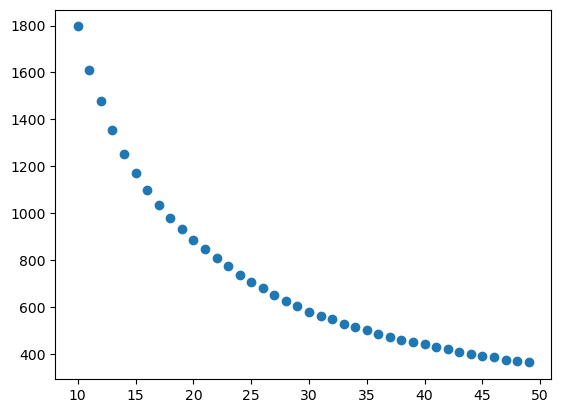

In [59]:
plt.scatter(clusters,scores)

In [45]:
clusters = range(10,50)
scores = []
for n in clusters:
    cluster = KMeans(n_clusters = n, random_state=0,n_init=10)
    pred = cluster.fit_predict(df_fin)
    score = silhouette_score(df_fin, pred)
    scores.append(score)

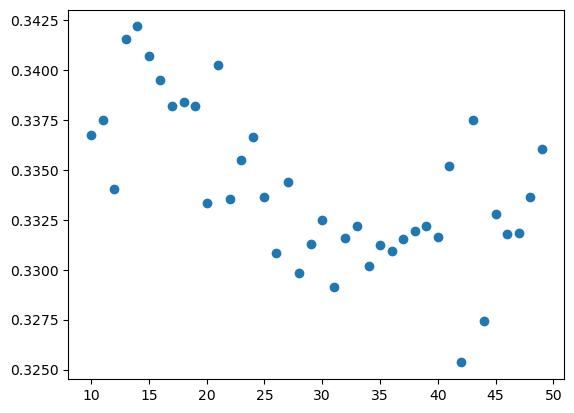

In [46]:
plt.scatter(clusters,scores)

In [53]:
ssd={}

for k in range(10,50):
    kmeans= KMeans(n_clusters=k, init='k-means++' ).fit(df_fin)
    ssd[k]=kmeans.inertia_

ssd

{10: 2213.820785836092,
 11: 2019.8774823342983,
 12: 1882.7608303722845,
 13: 1727.8538766576203,
 14: 1600.632511508981,
 15: 1515.9645541017917,
 16: 1420.0573289626236,
 17: 1349.8491140218891,
 18: 1282.7011256620067,
 19: 1249.9158809053647,
 20: 1149.304180739109,
 21: 1101.047287876024,
 22: 1051.938839739376,
 23: 1006.6163046845322,
 24: 967.4472387553592,
 25: 940.6158437423353,
 26: 895.9447863434282,
 27: 863.3350209568384,
 28: 853.733935511017,
 29: 806.0645606953269,
 30: 788.5962453622104,
 31: 754.841909098885,
 32: 735.8596498910332,
 33: 721.7509013668671,
 34: 696.1966755132167,
 35: 682.83137398335,
 36: 661.785987599782,
 37: 644.1726727815674,
 38: 631.5474238655735,
 39: 609.7560081663211,
 40: 595.7422368724239,
 41: 582.8926377604423,
 42: 567.7620369642955,
 43: 555.0259442178304,
 44: 539.7625848430591,
 45: 532.285831258146,
 46: 515.5796051278348,
 47: 508.51966105175273,
 48: 499.4699330845297,
 49: 487.7246310023902}

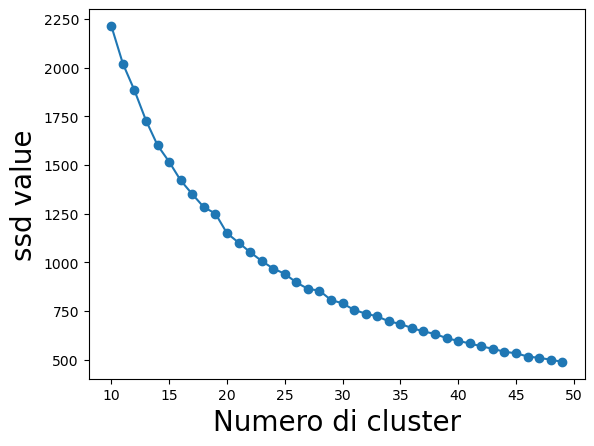

In [54]:
plt.plot(list(ssd.keys()),list(ssd.values()),marker='o')
plt.xlabel('Numero di cluster', fontsize= 20)
plt.ylabel('ssd value', fontsize=20)
plt.show()

In [9]:
'''
Function for plotting the features.
Arguments:
    data= numpy array with values of the features
    axlabel-> None: name axes will be given depending on the features observed 
'''
def plot_features(data, axlabel=None):
    
    sns.scatterplot(x=data[:,1],y=data[:,2], s=10)
    
    if axlabel!= None:
        plt.xlabel(axlabel[0],fontsize=12)
        plt.ylabel(axlabel[1],fontsize=12)
    
    plt.show()

In [31]:
'''
Function for visualization of the ssd curve(Elbow Method).
Arguments: 
    data= dataframe of interest
'''

def plot_ssd_curve(data):
    
    #creating a list with the ssd value of each training phase (k)
    ssd={}
    
    for k in range (1,200):
        #training the model for N_clusters= k
        kmeans= KMeans(n_clusters=k, init='k-means++').fit(data)
        
        #calculate ssd value for the key K
        ssd[k]=kmeans.inertia_
    
    #plot the dictionary with ssd values for each K 
    plt.plot(list(ssd.keys()),list(ssd.values()),markersize=4, marker='o')
    plt.xlabel('Number of clusters', fontsize= 13)
    plt.ylabel('SSD value', fontsize=13)
    plt.figure(figsize=(12, 6))
    plt.show()

In [11]:
'''
Function for plotting the clusters and their centroids.
Arguments:
    model-> kmeans model trained on K clusters
    data-> dataset
    axlabel-> None: name axes will be given depending on the features observed 
    print_ssd_curva-> False: if True the ssd value of the model will be given
'''

def plot_clusters(model,data,axlabel=None,print_ssd_curve=False,cluster_map=None):
    y_pred= model.predict(data)
    
    if cluster_map!= None:
        vfunc=np.vectorize(lambda x:cluster_map[x])

        classes= vfunc(y_pred)
        
        sns.scatterplot(x=data[:,0],y=data[:,1],hue=classes,s=10)
    
    else:

        sns.scatterplot(x=data[:,0],y=data[:,1],hue=y_pred, s=10)
    
    #plot centroids
    centers=model.cluster_centers_
        
    plt.scatter(centers[:,0],centers[:,1],c='red', s=18, alpha=0.5)
    
    if axlabel!= None:
        plt.xlabel(axlabel[0],fontsize=12)
        plt.ylabel(axlabel[1],fontsize=12)
    
    if print_ssd_curve:
        plt.text(data[:,0].max()-10,0,f'SSD= {model.inertia_:.2f}')
    
    plt.show()

In [9]:
'''
Scaling
'''
ss=StandardScaler()
df_scaled= ss.fit_transform(df)

In [10]:
'''
Applying PCA for eliminating the correlations between variables and selecting the ones with the highest informational value (highest variance value)
'''
pca= PCA()

pca.fit(df_scaled)

PCA()

<BarContainer object of 17 artists>

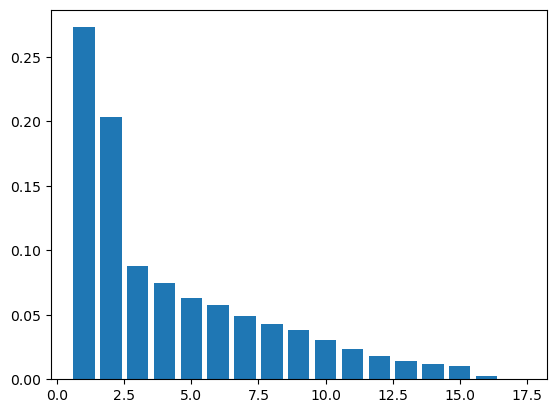

In [11]:
'''
Analysing the variables and their variance values.
Variables will be in decreasing order for explained variance ratio.
'''
x = range(1,df_scaled.shape[1]+1)
y = pca.explained_variance_ratio_
plt.bar(x,y)

Il numero appropriato per la PCA è 8, in quanto si ha una  diminuzione sotto lo 0.05 della varianza spiegata dalla nona variabile in poi

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221, 0.85021707, 0.88850511, 0.91930517])

La varianza cumulata a 8 componenti è circa del 85%, quindi tagliamo molte variabili meno informative preservando comunque la maggior parte dell' informazione.

In [13]:
'''
Applying the PCA only on the 8 most informative variables
'''
pca= PCA(10)

In [14]:
pca.fit(df_scaled)

PCA(n_components=10)

In [15]:
'''
Generating the pipeline for creating the optimal dataset for clustering
'''
pipe= make_pipeline(ss,pca)

#optimal dataset
df_pca= pipe.fit_transform(df)

In [16]:
'''
Calcolating skewness for understanding the level of simmetry or asimmetry
'''
np.abs(skew(df_pca))

array([3.22727471, 2.06731263, 1.64460687, 0.08592091, 1.93677865,
       1.43257068, 0.27801565, 3.20623261, 0.49199668, 0.60193533])

In [17]:
skewtest(df_pca).pvalue

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 9.15981180e-004,
       0.00000000e+000, 0.00000000e+000, 5.10769268e-026, 0.00000000e+000,
       1.25166069e-072, 4.61623806e-103])

Le variabili sono tutte molto asimmetriche (tranne la quarta che presenta un'asimmetria molto più ridotta rispetto alle altre)

In [18]:
'''
applying the power transformation for riducing as much as possible the asimmetry of the variables
'''
pipe = make_pipeline(ss,pca, PowerTransformer())

df_pt= pipe.fit_transform(df)

In [19]:
'''
Calcolating skewness for understanding the new level of asimmetry
'''
np.abs(skew(df_pt))

array([0.1452962 , 0.09618047, 0.02693103, 0.47913923, 0.04796513,
       0.36883098, 0.46646728, 0.22656146, 0.34044723, 0.21026967])

In [20]:
skewtest(df_pt).pvalue

array([2.30782774e-08, 2.07853702e-04, 2.97961643e-01, 2.58895223e-69,
       6.38821525e-02, 2.13164537e-43, 4.21814622e-66, 5.18601880e-18,
       1.51053676e-37, 8.92531279e-16])

Applichiamo un'ultima riscalatura dopo la trasformazione di potenza.

In [21]:
pipe=make_pipeline(ss,pca, PowerTransformer(), StandardScaler())

df_final= pipe.fit_transform(df)

## Clusters visualization

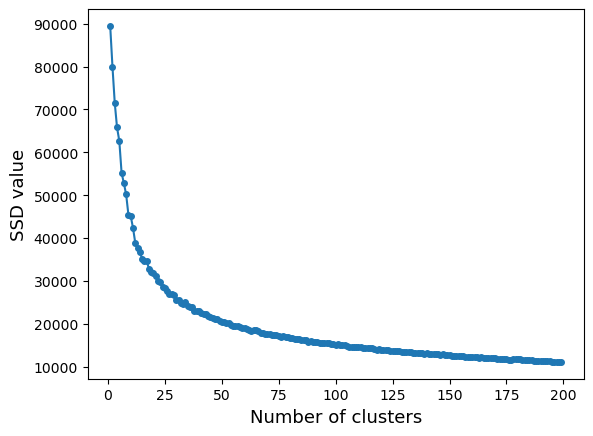

<Figure size 1200x600 with 0 Axes>

In [32]:
plot_ssd_curve(df_final)